# Geospatial Analysis

### step1: importing the libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### step 2: loading the dataset

In [2]:
#load the dataset
df= pd.read_csv(r'C:\machine-learning\cognifyz-internship\Dataset .csv')
print("shape of dataset:", df.shape)


shape of dataset: (9551, 21)


In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### step 3: visualising the locations on a map

In [9]:
!pip install folium


In [21]:
import folium as fo

# Create a map centered around the average latitude and longitude
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = fo.Map(location=map_center, zoom_start=5)

# Add a title to the map
title = '''
     <h3 align="center" style="font-size:20px"><b>Restaurant Locations</b></h3>
     '''
restaurant_map.get_root().html.add_child(fo.Element(title))


# Add markers for each restaurant
for index, row in df.head(1000).iterrows():
    fo.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Restaurant Name'],
        icon=fo.Icon(color='pink', icon='info-sign'),
        color='black',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        radius=10
    ).add_to(restaurant_map)

restaurant_map

### step4: analyzing the distribution of restaurants across different countries as well as cities

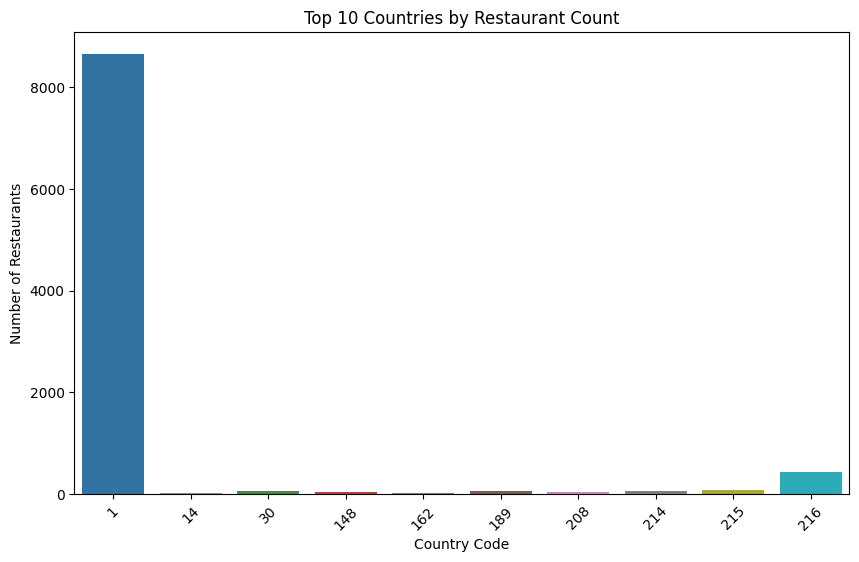

In [31]:
#For top 10 Countries by restaurant count
top_countries= df['Country Code'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='tab10', hue=top_countries.index, legend=False)
plt.title('Top 10 Countries by Restaurant Count')
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()



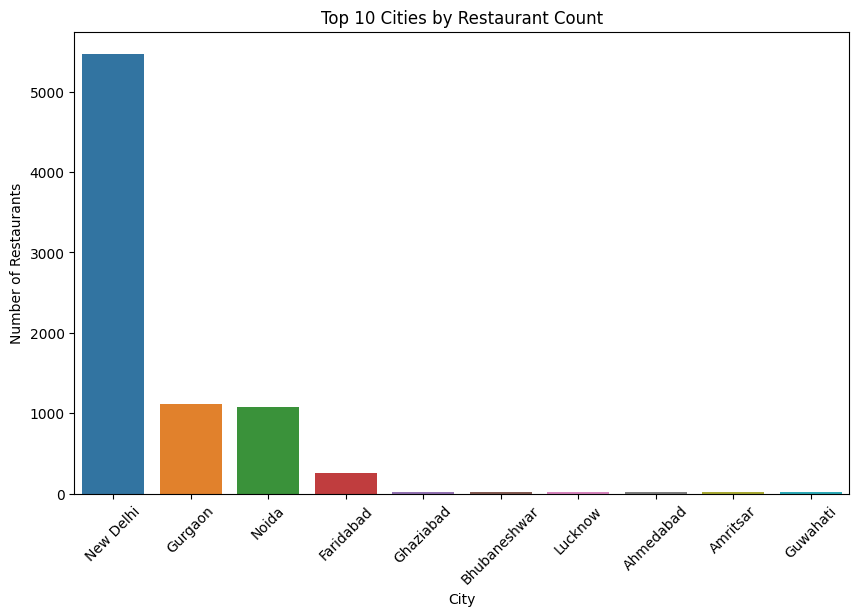

In [30]:
#For Top 10 Cities by restaurant count
top_cities = df['City'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='tab10', hue=top_cities.index, legend=False)
plt.title('Top 10 Cities by Restaurant Count')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

### step 5: finding correlation between restaurant location and rating

In [32]:
#Average rating per city (with at least 10 restaurants)
city_ar = df.groupby('City')['Aggregate rating'].agg(['mean', 'count'])
filtered_cities = city_ar[city_ar['count'] >= 10].sort_values(by='mean', ascending=False)

print("Cities with at least 10 restaurants and their highest average ratings:")
print(filtered_cities.head(10))

Cities with at least 10 restaurants and their highest average ratings:
                    mean  count
City                           
London          4.535000     20
Orlando         4.475000     20
Tampa Bay       4.410000     20
Rest of Hawaii  4.410000     20
Bangalore       4.375000     20
Dubai           4.370000     20
Jakarta         4.356250     16
Hyderabad       4.344444     18
Chennai         4.315000     20
Ankara          4.305000     20


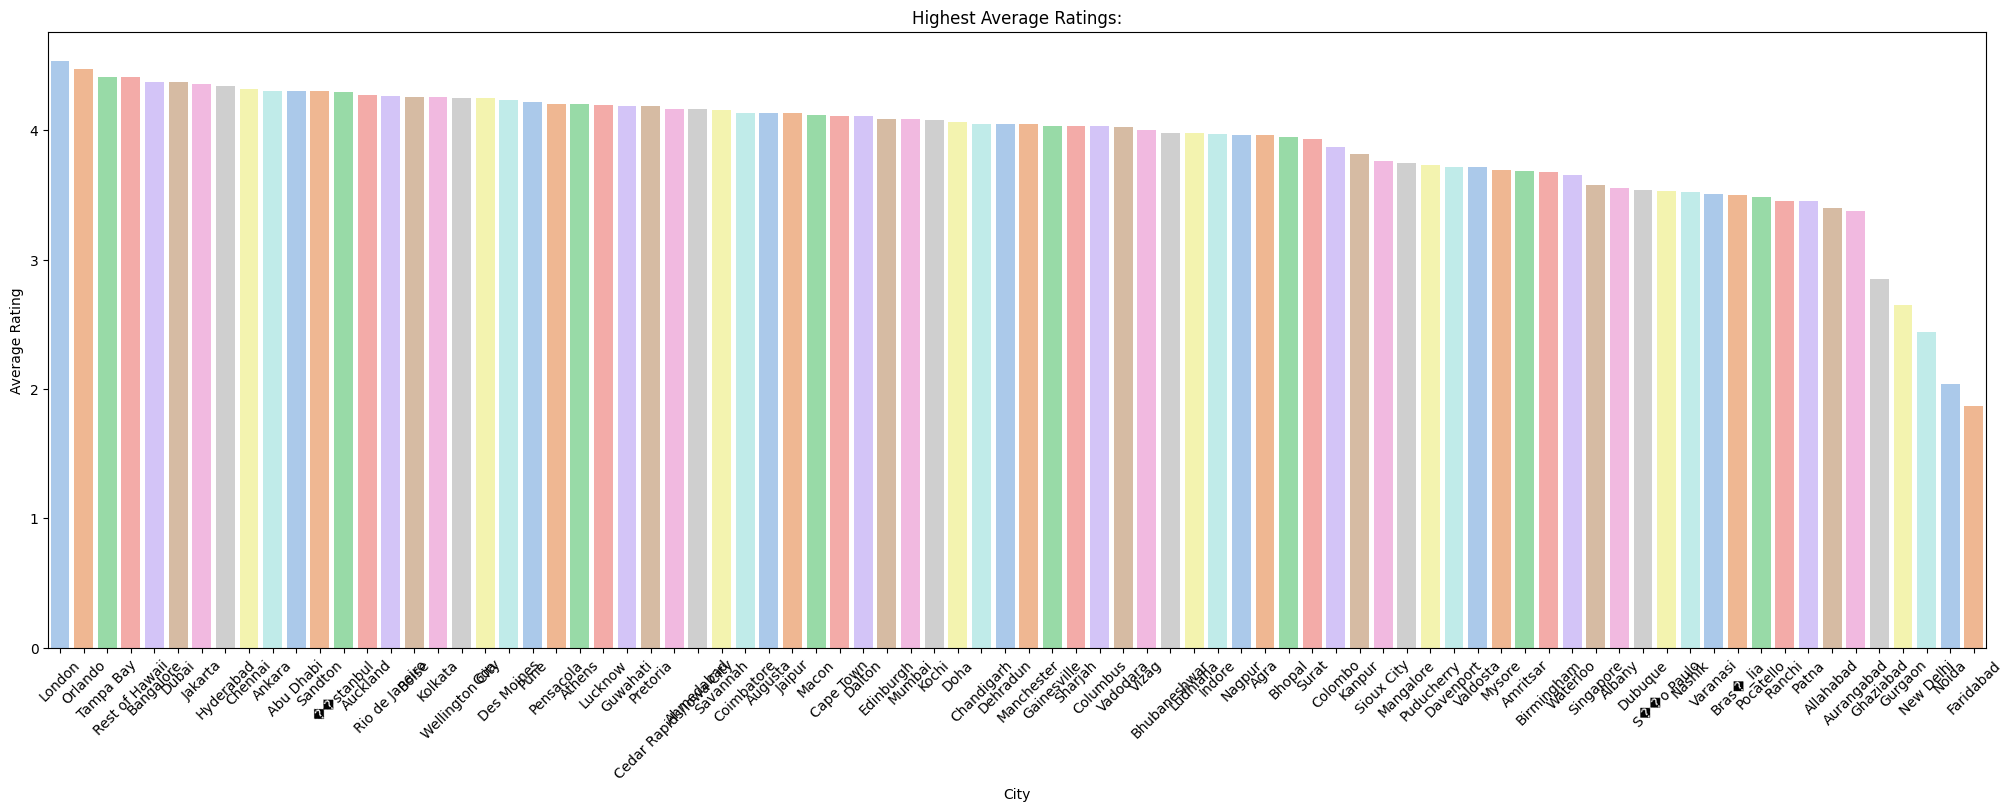

In [50]:
plt.figure(figsize=(25, 8))
sns.barplot(x=filtered_cities.index, y=filtered_cities['mean'], palette='pastel', hue=filtered_cities.index, legend=False)
plt.title('Highest Average Ratings:')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [56]:
#Pearson correlation 
p_cor = df.corr(method='pearson', numeric_only=True)

print("Correlation between latitude and rating:", df['Latitude'].corr(df['Aggregate rating']))
print("Correlation between longitude and rating:", df['Longitude'].corr(df['Aggregate rating']))



Correlation between latitude and rating: 0.0005155806902360251
Correlation between longitude and rating: -0.1168175773454043


In [ ]:
#Spearman correlation
s_cor = df.corr(method='spearman', numeric_only=True)

print("Spearman correlation between latitude and rating:", df['Latitude'].corr(df['Aggregate rating']))
print("Spearman correlation between longitude and rating:", df['Longitude'].corr(df['Aggregate rating']))


Spearman correlation between latitude and rating: 0.0005155806902360251
Spearman correlation between longitude and rating: -0.1168175773454043


### step 6: visualizing the correlations

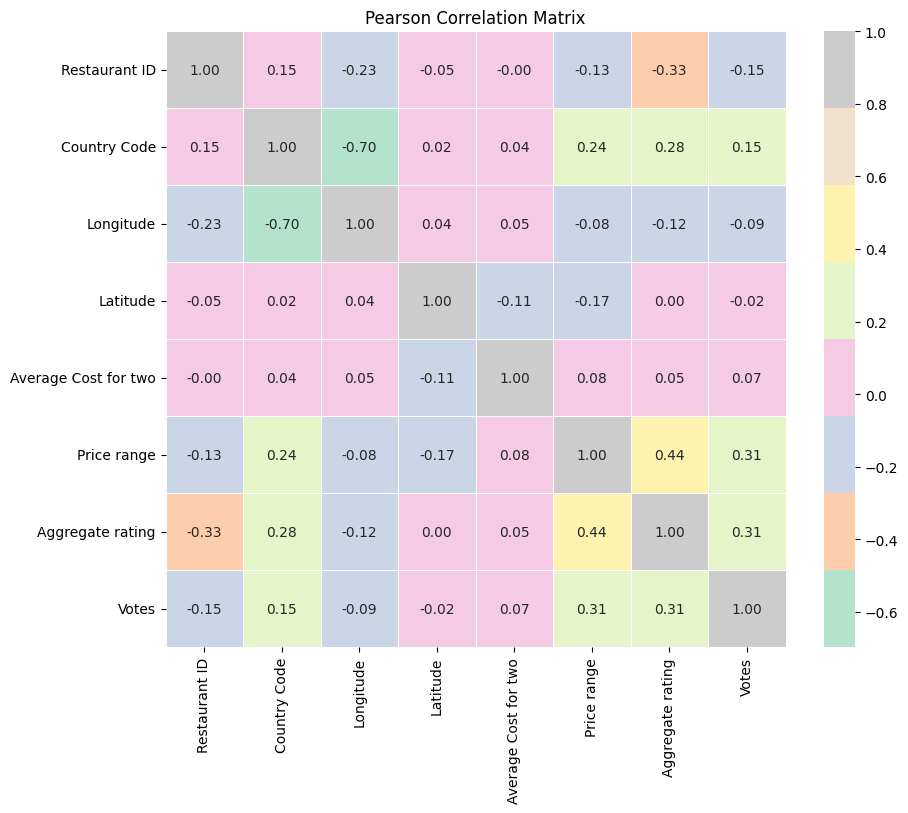

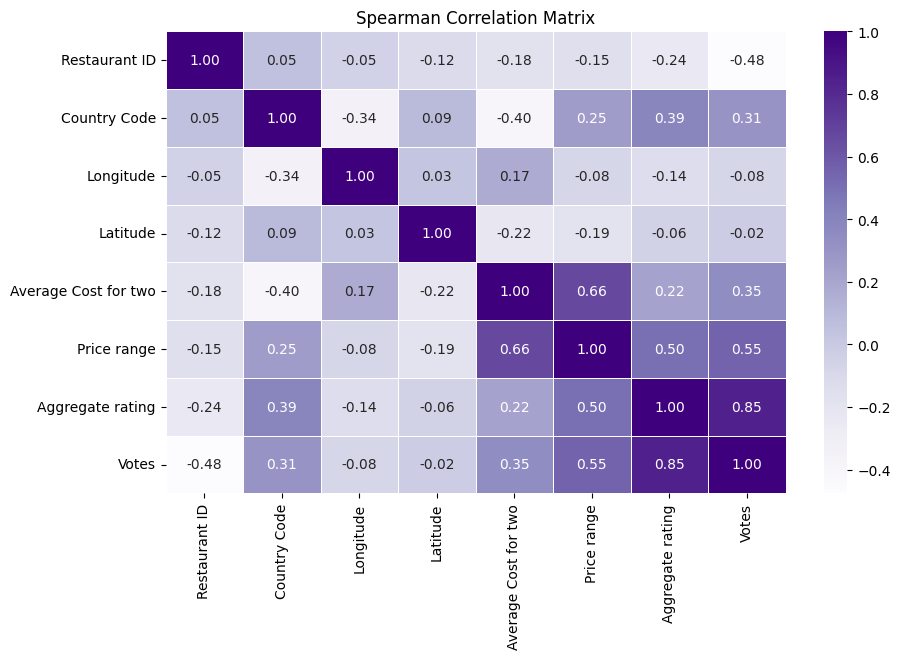

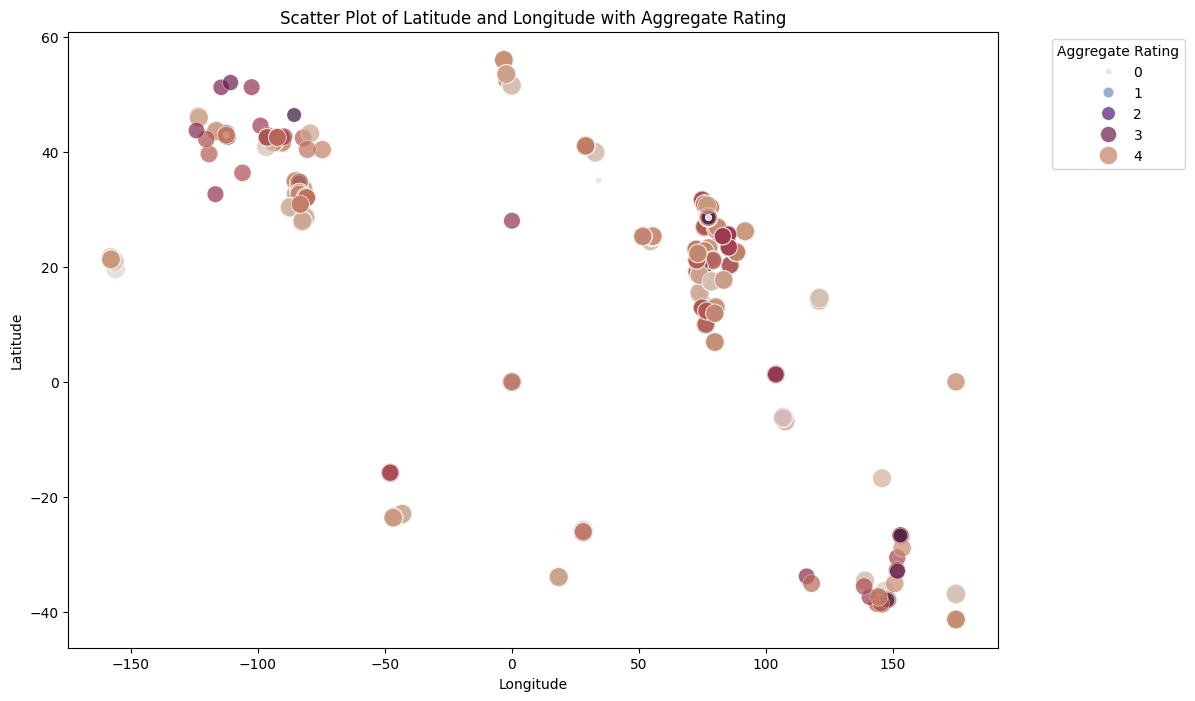

In [80]:
#Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(p_cor, annot=True, cmap='Pastel2', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(s_cor, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()

#Visualizing the relationship between latitude, longitude, and aggregate rating
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Aggregate rating', palette='twilight', size='Aggregate rating', sizes=(20, 200), alpha=0.7)
plt.title('Scatter Plot of Latitude and Longitude with Aggregate Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Aggregate Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



### end of Level 1:task 3